# V.1: Exploring the green reds

### a) Write a function that will plot a scatterplot matrix of your red wine data. Your function should plot wines with quality over some “good_threshold” as one color, and wines below some “bad_threshold” as another. Your plotting function should have the option to save a .png of your plots. Here’s an example function definition:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
redWine = pd.read_csv('./resources/winequality-red.csv', ';')
redWine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


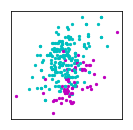

In [133]:
plt.figure(figsize=[2,2])
# plt.xticks([])
# plt.yticks([])
plt.tick_params(axis='both', left=False, bottom=False, labelleft=False, labelbottom=False)
for index, row in redWine.iterrows():
    if row['quality'] > 6:
        plt.scatter(row['pH'], row['alcohol'], color='c',s=5)
    elif row['quality'] < 5:
        plt.scatter(row['pH'], row['alcohol'], color='m',s=5)
plt.show()

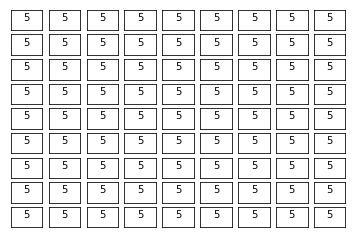

In [4]:
for i in range(1,82):
    plt.subplot(9,9,i)
    plt.xticks([])
    plt.yticks([])
d    plt.text(.5, .5, s=5, fontsize=10, ha='center')

In [156]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    
    features = wine_data.columns.values
    nb_features = len(features)
    x = 0
    y = 0
    figx = plt.figure(figsize=[20,20])

    for y in range(nb_features):
        for x in range(nb_features):
            plt.subplots_adjust(hspace=0, wspace=0)

            # feature name text plots
            if x == y:

                plt.subplot2grid((nb_features, nb_features), (x,y), fig=figx)
                plt.tick_params(axis='both', 
                                left=False, 
                                bottom=False, 
                                labelleft=False, 
                                labelbottom=False)
                plt.text(.5,
                         .5, 
                         features[x].replace(' ', '\n'), 
                         horizontalalignment='center',
                         verticalalignment='center',
                         fontsize=20
                        )
                
            # scatter plots
            # only need to traverse half of the plots since top half is the inverse of 
            # bottom half and have the same data, just switch x and y.
            elif x > y:
                goodx = []
                goody = []
                badx = []
                bady = []

                for index, row in wine_data.iterrows():
                    if row['quality'] > good_threshold:
                        goodx.append(row[x])
                        goody.append(row[y])
                    elif row['quality'] < bad_threshold:
                        badx.append(row[x])
                        bady.append(row[y])
                plt.subplot2grid((nb_features, nb_features), (x,y), fig=figx)
                plt.tick_params(axis='both', 
                                left=False, 
                                bottom=False, 
                                labelleft=False, 
                                labelbottom=False)
                plt.scatter(goody, goodx, color='g',s=10)
                plt.scatter(bady, badx, color='m',s=10)
                
                # plotting the inverse 
                plt.subplot2grid((nb_features, nb_features), (y,x), fig=figx)
                plt.tick_params(axis='both', 
                                left=False, 
                                bottom=False, 
                                labelleft=False, 
                                labelbottom=False)
                plt.scatter(goodx, goody, color='g',s=10)
                plt.scatter(badx, bady, color='m',s=10)
                
            else:
                continue 
                
    if save_plot:
        plt.savefig('./scatter_plt_matrix')

In [153]:
testWine = redWine.iloc[:, :3]
testWine['quality'] = redWine['quality']
testWine.head(3)

,fixed acidity,volatile acidity,citric acid,quality
0,7.4,0.70,0.00,5
1,7.8,0.88,0.00,5
2,7.8,0.76,0.04,5


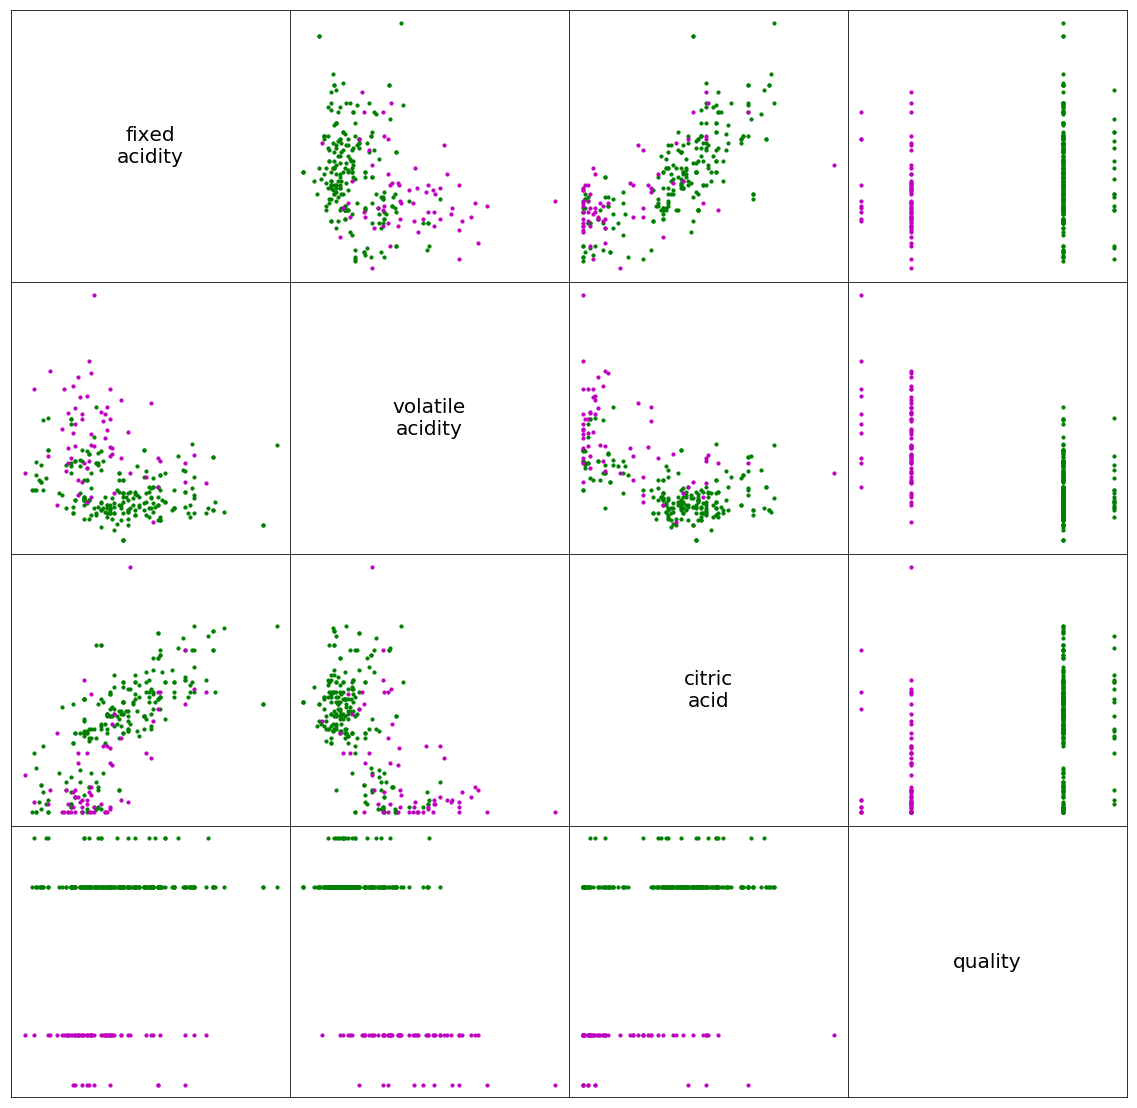

In [154]:
plot_scatter_matrix(testWine, 6, 5, save_plot=True)

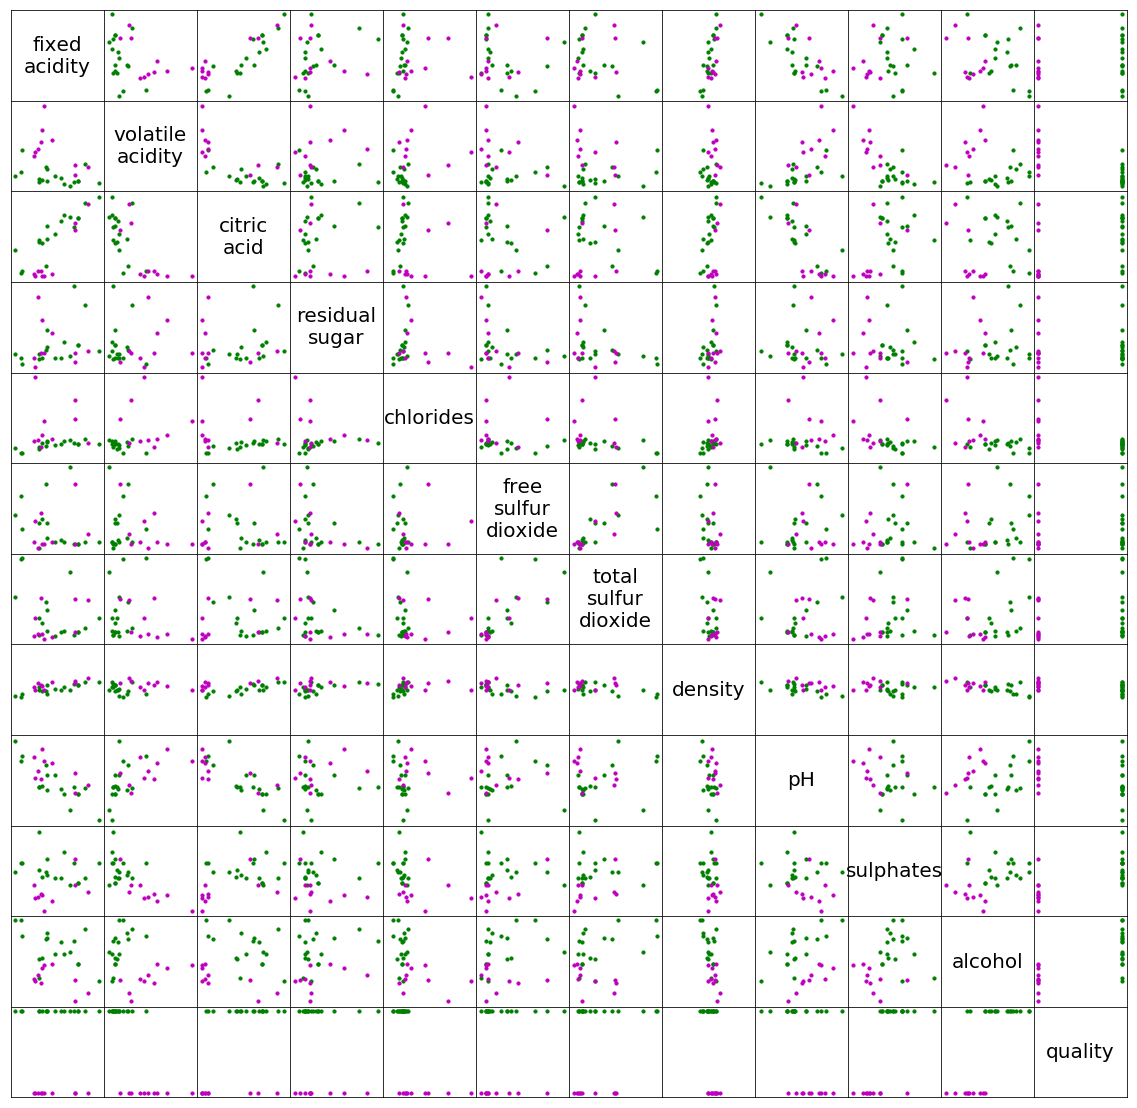

In [155]:
plot_scatter_matrix(redWine, 7, 4, save_plot=True)

### b) Now that you’ve had a chance to analyze different chemical factors in red wines and their relationship with high scores (8 or higher) and low scores (3 or lower), which factors do you think will be most useful to your perceptron for distinguishing high quality vs. low quality wines? Why?

#### I think alcohol, sulphates or volatile acidity will be most helpful because good and bad quality are more differentiable. 

# V.2 Learning to perceptron

### a) Implement a perceptron that:
#### • Has randomly initialized weights and bias  
#### • Uses the Rosenblatt perceptron learning rule (with changeable learning rate)  
#### • Utilizes the heaviside step activation function (discrete version)  

In [157]:
# perceptron is inspired by the information processing of a single neural cell called a neuron
# perceptron receives input signals from examples of training data that we weight and 
# combined in a linear equation called the activation.

In [ ]:
"""
https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html
Rosenblatt’s initial perceptron rule is fairly simple and can be summarized by the following steps:

Initialize the weights to 0 or small random numbers.
For each training sample x(i):
Calculate the output value.
Update the weights.
"""

In [158]:
import random

In [288]:
perceptron_data = redWine.loc[:, ['alcohol', 'sulphates']]
perceptron_data['qualityx'] = redWine['quality'].apply(lambda x: 1 if (x >= 8) else (0 if x <= 3 else None))
perceptron_data = perceptron_data.dropna().reset_index()
print(perceptron_data.head(5))
perceptron_train = perceptron_data.iloc[:, 1:3]
print(perceptron_train)
perceptron_labels = perceptron_data.loc[:, 'qualityx']

perceptron_train = perceptron_train.values.tolist()
print(perceptron_train)
perceptron_labels = perceptron_labels.values.tolist()
print(perceptron_labels)

   index  alcohol  sulphates  qualityx
0    267     12.8       0.86       1.0
1    278     12.6       0.82       1.0
2    390     12.9       0.82       1.0
3    440      9.8       0.82       1.0
4    455     13.4       0.69       1.0
    alcohol  sulphates
0     12.80       0.86
1     12.60       0.82
2     12.90       0.82
3      9.80       0.82
4     13.40       0.69
5      9.00       0.57
6     11.70       0.92
7     11.00       0.65
8     11.00       0.65
9      8.40       0.63
10    14.00       0.74
11    10.70       0.54
12    12.70       0.74
13     9.90       0.86
14    11.00       0.49
15    12.50       0.69
16    11.80       0.63
17    13.10       0.72
18    11.70       0.69
19    14.00       0.82
20    10.90       0.40
21     9.80       0.51
22    10.00       1.10
23    11.30       0.76
24     9.70       0.55
25    10.20       0.52
26     9.95       0.63
27    11.40       0.70
[[12.8, 0.86], [12.6, 0.82], [12.9, 0.82], [9.8, 0.82], [13.4, 0.69], [9.0, 0.57], [11.7, 0.92], [1

In [309]:
def discrete_heaviside_activation(n):
    return 0 if n < 0 else 1

def predict(row, weights):

    if len(weights) - 1 is not len(row):
        print('Number of weights({}) should be 1 more than features({})'
                                                          .format(len(weights), len(row)))
        return 
    # setting bias
    activation = weights[0]
    
    for i in range(len(row) - 1):
        activation += weights[i + 1] * row[i]
    return discrete_heaviside_activation(activation)

In [328]:
def train_weights(train_data, label_data, learning_rate=1, epochs=1):
    
    features_count = len(train_data[0])
    
    # init weights
    weights = []
    results = []
    for i in range(features_count + 1):
        w = round(random.random(), 2)
        weights.append(w)
    
    for e in range(epochs):
        errors = []
        for row, target in zip(train_data, label_data):
            
            new_weights = []
            update = learning_rate * (target - predict(row, weights))
            new_weights.append(update)
            for x_i in row:
                new_weights.append(update * x_i)
            weights = new_weights
            errors.append(int(update != 0.0))
        results.append([e + 1, sum(errors), weights])
    return results

In [329]:
def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-329-bfbc0ab6d1b4>, line 2)

In [334]:
train_weights(perceptron_train, perceptron_labels, learning_rate=.1, epochs=5)

[[1, 11, [0.1, 1.1400000000000001, 0.06999999999999999]],
 [2, 11, [0.1, 1.1400000000000001, 0.06999999999999999]],
 [3, 11, [0.1, 1.1400000000000001, 0.06999999999999999]],
 [4, 11, [0.1, 1.1400000000000001, 0.06999999999999999]],
 [5, 11, [0.1, 1.1400000000000001, 0.06999999999999999]]]

In [216]:
predict(perceptron_train.iloc[1, :], [2, .1, 1])

1

#### b) You’ll need to implement a function to train your perceptron. Your training function
#### should take in your red wine data as a parameter and should: